In [64]:
import os
import pandas as pd
import cv2
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [264]:
# For mask
file_path = 'E:/segmentationstudy/image/up/up100_1m/up100_1m'
mask_list = []
for (path, dir, files) in os.walk(file_path):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.PNG':
            filePath = "{0}/{1}".format(path, filename)
            # print(filePath)
            mask_list.append(filePath)

In [265]:
'/'.join(mask_list[0].split('/')[:-1])+'/'+str(int(mask_list[0].split('/')[-1].split('.')[0])+100)+'.PNG'

'E:/segmentationstudy/image/up/up100_1m/up100_1m/201.PNG'

In [203]:
# Change name for mask PNG file
for i in mask_list:
    os.rename(i, '/'.join(i.split('/')[:-1])+'/'+str(int(i.split('/')[-1].split('.')[0])+100)+'.PNG')

In [266]:
# For original file
jpg_list = []
for (path, dir, files) in os.walk(file_path):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.jpg':
            filePath = "{0}/{1}".format(path, filename)
            # print(filePath)
            jpg_list.append(filePath)

In [205]:
# Change name for original jpg file
for i in range(len(mask_list)):
    os.rename(jpg_list[i], '/'.join(mask_list[i].split('/')[:-1])+'/'+str(i+181)+'.jpg')

In [267]:
# Update mask_list, jpg_list
mask_list = []
for (path, dir, files) in os.walk(file_path):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.PNG':
            filePath = "{0}/{1}".format(path, filename)
            # print(filePath)
            mask_list.append(filePath)
jpg_list = []
for (path, dir, files) in os.walk(file_path):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.jpg':
            filePath = "{0}/{1}".format(path, filename)
            # print(filePath)
            jpg_list.append(filePath)
mask_list.sort()
jpg_list.sort()

In [268]:
# For jpg_list original files
jpg_pixel=[]
for i in jpg_list:
    img = Image.open(i).convert('L')
    image = np.array(img, 'uint8')
    resizeimage = cv2.resize(image, (1500, 1500))
    mean, std = resizeimage.mean(), resizeimage.std()
    jpg_pixel.append((np.clip((resizeimage-mean)/std, -2.0, 2.0)+2.0)/4.0)
# For mask_list mask PNG files
mask_pixel=[]
for i in mask_list:
    img = Image.open(i).convert('L')
    image = np.array(img, 'uint8')
    resizeimage = cv2.resize(image, (1500, 1500))
    mean, std = resizeimage.mean(), resizeimage.std()
    mask_pixel.append((np.clip((resizeimage-mean)/std, -2.0, 2.0)+2.0)/4.0)

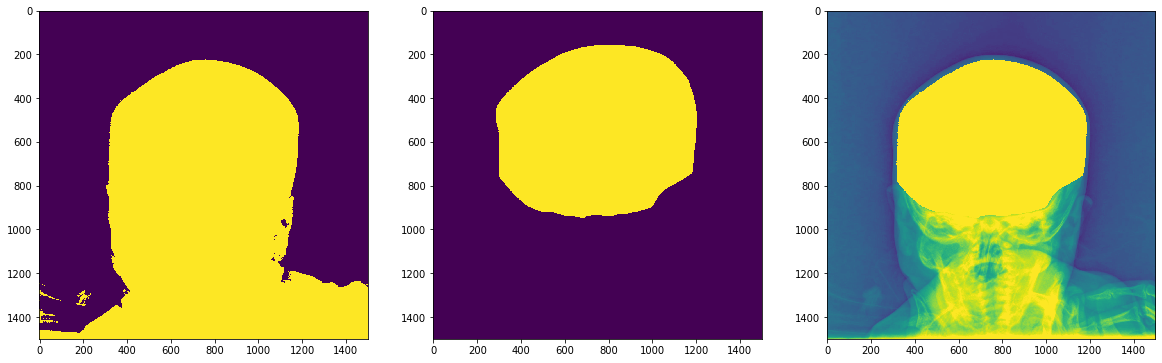

In [270]:
# Copy of jpg_pixel, mask_pixel
import copy
jpg_pixel_copy=copy.deepcopy(jpg_pixel)
mask_pixel_copy=copy.deepcopy(mask_pixel)

i=0
plt.figure(figsize=(20, 10))
plt.subplot(131)
jpg_pixel_copy[i][jpg_pixel_copy[i] <= 0.4] = 0
jpg_pixel_copy[i][jpg_pixel_copy[i] > 0.4] = 1
plt.imshow(jpg_pixel_copy[i])

plt.subplot(132)
mask_pixel_copy[i][mask_pixel_copy[i] <= 0.8] = 0
mask_pixel_copy[i][mask_pixel_copy[i] > 0.8] = 1
plt.imshow(mask_pixel_copy[i])

plt.subplot(133)
mask=np.minimum(jpg_pixel_copy[i], mask_pixel_copy[i])
plt.imshow(np.maximum(jpg_pixel[i], mask))

import matplotlib
matplotlib.image.imsave('E:/segmentationstudy/image/up/upmask/'+str(i+101)+'.jpg', mask)

In [314]:
## fill holes of each mask
# For real mask
file_path = 'E:/segmentationstudy/image/up/upmask'
realmask_list = []
for (path, dir, files) in os.walk(file_path):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.jpg':
            filePath = "{0}/{1}".format(path, filename)
            # print(filePath)
            realmask_list.append(filePath)

In [315]:
for i in realmask_list:
    img = Image.open(i).convert('L')
    image = np.array(img, 'uint8')
    image[image<150]=0
    image[image>=150]=1
    img_fill_holes = scipy.ndimage.binary_fill_holes(image[:,:]).astype(int)
    matplotlib.image.imsave(i, img_fill_holes)